In [80]:
import torch
print(torch.__version__)
print(torch.version.cuda)
torch.cuda.is_available()

2.0.0+cpu
None


False

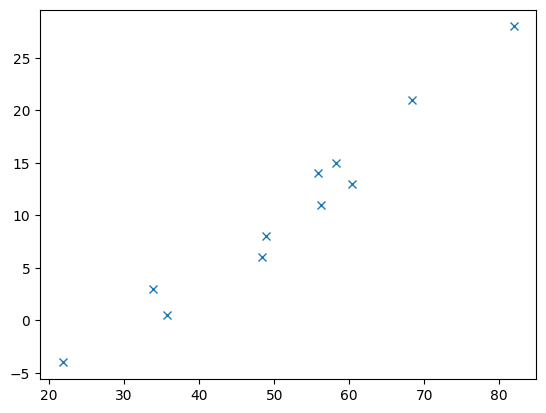

In [81]:
import numpy as np
values = np.loadtxt('vl5_data.csv')
import matplotlib.pyplot as plt
t_u = torch.tensor(values[:,1])
t_c = torch.tensor(values[:,0])
plt.plot(t_u, t_c, 'x')

In [82]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

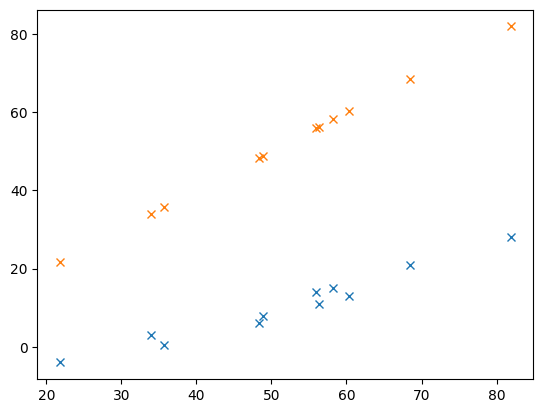

tensor(1763.8845, dtype=torch.float64)


In [83]:
w = torch.ones(1)
b = torch.zeros(1)
t_p = model(t_u, w, b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))

In [84]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w+delta, b), t_c) - loss_fn(model(t_u, w-delta, b), t_c))/(2.0 * delta)
loss_rate_of_change_b = (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b-delta), t_c))/(2.0 * delta)

loss_fn = 1763.8845454545458
loss_fn = 1565.7613932795966
loss_fn = 1379.647953172533
loss_fn = 1205.544225133356
loss_fn = 1043.4502091620643
loss_fn = 893.3659052448772
loss_fn = 755.2913133977559
loss_fn = 629.2264336207004
loss_fn = 515.171265913711
loss_fn = 413.1258102767874
loss_fn = 323.09006670992983
loss_fn = 245.06403521313806
loss_fn = 179.04771578641237
loss_fn = 125.0411084297525
loss_fn = 83.04421314315856
loss_fn = 53.057029926630555
loss_fn = 35.07955878016849
loss_fn = 29.11179969071484
loss_fn = 35.15374475062026
loss_fn = 53.20539395988475


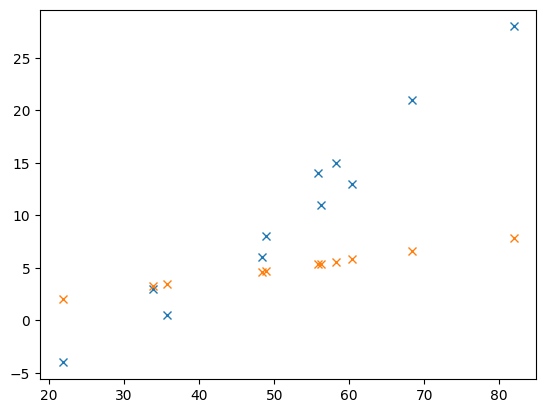

tensor(83.2667, dtype=torch.float64)


In [85]:
w = torch.ones(1)
b = torch.zeros(1)
learning_rate = 1e-5
for i in range(20):
    t_p = model(t_u, w, b)
    print(f'loss_fn = {loss_fn(t_p, t_c)}')
    w = w - learning_rate*loss_rate_of_change_w
    b = b - learning_rate*loss_rate_of_change_b
    
t_p = model(t_u, w, b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))

In [86]:
def dloss_fn(t_p, t_c):
    return 2*(t_p-t_c) / t_p.size(0)

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

loss_fn = 1763.8845454545458
loss_fn = 41399.58620778713
loss_fn = 986624.299525972
loss_fn = 23528156.490046952
loss_fn = 561094193.3334918
loss_fn = 13380863399.17997
loss_fn = 319104196719.3658
loss_fn = 7609933912583.775
loss_fn = 181480220610500.25
loss_fn = 4327904646205531.0
loss_fn = 1.0321100667296523e+17
loss_fn = 2.461355781296724e+18
loss_fn = 5.869792429665394e+19
loss_fn = 1.3998163199524652e+21
loss_fn = 3.338254548727587e+22
loss_fn = 7.961003194697937e+23
loss_fn = 1.898524226191001e+25
loss_fn = 4.5275630117831364e+26
loss_fn = 1.0797241851774887e+28
loss_fn = 2.574904923843859e+29


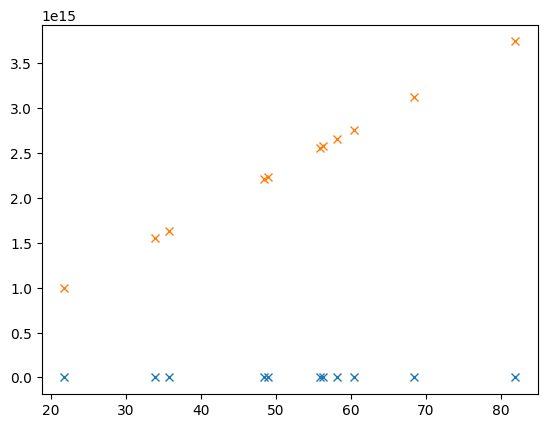

tensor(6.1406e+30, dtype=torch.float64)


In [87]:
w = torch.ones(1)
b = torch.zeros(1)
learning_rate = 1e-3
for i in range(20):
    t_p = model(t_u, w, b)
    print(f'loss_fn = {loss_fn(t_p, t_c)}')
    grad = grad_fn(t_u, t_c, t_p, w, b)
    w = w - learning_rate*grad[0]
    b = b - learning_rate*grad[1]
    
t_p = model(t_u, w, b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))

In [88]:
t_un = t_u * 0.1

loss_fn = 80.36434545454544
loss_fn = 37.574911732266536
loss_fn = 30.871081047363017
loss_fn = 29.756195275714166
loss_fn = 29.50714752719622
loss_fn = 29.392453862949274
loss_fn = 29.298826302053385
loss_fn = 29.208718926609627
loss_fn = 29.11941323410978
loss_fn = 29.030487525771832
loss_fn = 28.94187568154292
loss_fn = 28.853566422912266
loss_fn = 28.765557272031653
loss_fn = 28.677846899762244
loss_fn = 28.59043427437194
loss_fn = 28.503318326381315
loss_fn = 28.416498128131447
loss_fn = 28.32997272522695
loss_fn = 28.2437409583309
loss_fn = 28.157801900132505


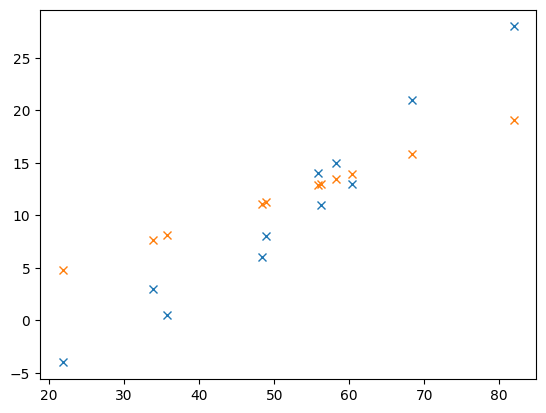

tensor(28.0722, dtype=torch.float64)


In [89]:
w = torch.ones(1)
b = torch.zeros(1)
learning_rate = 1e-2
for i in range(20):
    t_p = model(t_un, w, b)
    print(f'loss_fn = {loss_fn(t_p, t_c)}')
    grad = grad_fn(t_un, t_c, t_p, w, b)
    w = w - learning_rate*grad[0]
    b = b - learning_rate*grad[1]
    
t_p = model(t_un, w, b)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))

In [90]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for i in range(n_epochs):
        t_p = model(t_u, *params)
        print(f'loss_fn = {loss_fn(t_p, t_c)}')
        grad = grad_fn(t_u, t_c, t_p, *params)
        params = params - learning_rate * grad
    return params

loss_fn = 80.36434545454544
loss_fn = 37.57491443720965
loss_fn = 30.87108149399124
loss_fn = 29.756196009195058
loss_fn = 29.507148000491892
loss_fn = 29.39245416713703
loss_fn = 29.298826583908706
loss_fn = 29.208719127832026
loss_fn = 29.11941350320999
loss_fn = 29.030487848051678
loss_fn = 28.941875959000978
loss_fn = 28.85356671758456
loss_fn = 28.765557539430105
loss_fn = 28.67784716479513
loss_fn = 28.59043454200422
loss_fn = 28.50331865451376
loss_fn = 28.416498494118965
loss_fn = 28.32997305679455
loss_fn = 28.243741342040803
loss_fn = 28.15780235277251
loss_fn = 28.072155095292
loss_fn = 27.98679857927527
loss_fn = 27.901731817760187
loss_fn = 27.816953827135034
loss_fn = 27.732463627127036
loss_fn = 27.64826024079117
loss_fn = 27.564342694498734
loss_fn = 27.480710017926143
loss_fn = 27.397361244043758
loss_fn = 27.314295409104588
loss_fn = 27.231511552633265
loss_fn = 27.149008717414873
loss_fn = 27.066785949483894
loss_fn = 26.98484229811317
loss_fn = 26.903176815802922
lo

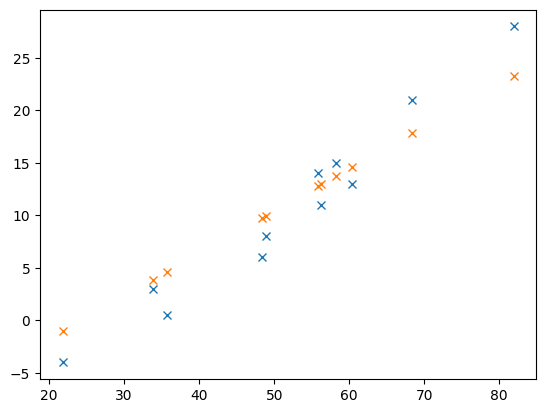

tensor(7.8434, dtype=torch.float64)


In [94]:
w = torch.ones(1)
b = torch.zeros(1)
learning_rate = 1e-2

t_un = t_u * 0.1
params = training_loop(500, learning_rate, torch.tensor([w, b]), t_un, t_c)

t_p = model(t_un, *params)
plt.plot(t_u, t_c, 'x')
plt.plot(t_u, t_p, 'x')
plt.show()
print(loss_fn(t_p, t_c))